In [46]:
import matplotlib.pyplot as plt
import numpy as np
# import brian2 as b2
import hh
import importlib
# importlib.reload(hh)
from ipywidgets import *
%matplotlib widget

Simulate constant current inputs of varying amplitudes

In [82]:
# Precompute outputs
ls_Iexts = []
ls_arr_outs = []
for Iamp in np.arange(-3, -14, -0.25):
    neuron = hh.HH(tFinal=100)
    neuron.initialize()
    
    Iext = np.zeros(neuron.time.shape[0])
    Iext[100:] = Iamp
    
    neuron.simulate(Iext)
    ls_Iexts.append(Iext)

    arr_append = np.dstack((neuron.arr_h, neuron.arr_m, neuron.arr_n, neuron.arr_V))
    ls_arr_outs.append(arr_append)

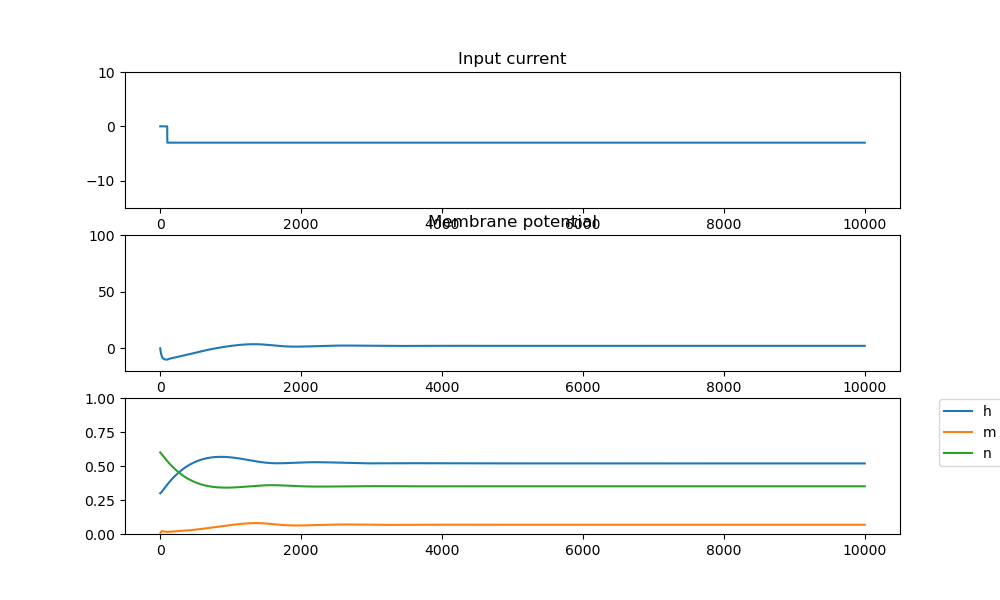

interactive(children=(IntSlider(value=0, description='idx', max=43), Output()), _dom_classes=('widget-interact…

<function __main__.update(idx=0)>

In [89]:
# Interactive plot
idx = 0
arr_out = ls_arr_outs[idx].squeeze()
Iext = ls_Iexts[idx]
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(3, 1, 1)
l1 = ax1.plot(Iext)
ax1.set_ylim(-15, 10)
ax1.set_title(f'Input current')# Title doesn't dynamically update  = {Iext.max():.2f}')

ax = fig.add_subplot(3, 1, 2)
l2 = ax.plot(-arr_out[:, 3])
ax.set_ylim(-20, 100)
ax.set_title('Membrane potential')

ax = fig.add_subplot(3, 1, 3)
l3 = ax.plot(arr_out[:, 0], label='h')
l4 = ax.plot(arr_out[:, 1], label='m')
l5 = ax.plot(arr_out[:, 2], label='n')
ax.legend(loc=(1.05, 0.5))
ax.set_ylim(0, 1)
plt.show()
plt.subplots_adjust(hspace=0.5)

def update(idx=0):
    arr_out = ls_arr_outs[idx].squeeze()
    Iext = ls_Iexts[idx]
    l1[0].set_ydata(Iext)
    l2[0].set_ydata(-arr_out[:, 3])
    l3[0].set_ydata(arr_out[:, 0])
    l4[0].set_ydata(arr_out[:, 1])
    l5[0].set_ydata(arr_out[:, 2])
    # ax1.set_title(f'Input current = {Iext.max():.2f}')
    fig.canvas.draw_idle()

interact(update, idx=(0, len(ls_Iexts)-1, 1))

## Why do we see the sudden spiking behavior?